# Company Default Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn.metrics as metrics

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [2]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Fixing messy column names (containing spaces) for ease of use

In [3]:
Col_names = pd.read_excel('Data_Dictionary.xlsx')
Col_names=Col_names['New Field Name'].tolist()

In [4]:
Company.columns=Col_names

#### Checking top 5 rows again

In [5]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [6]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Checking datatype of all columns

In [7]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

In [8]:
Company.drop(['Co_Code','Co_Name'], axis = 1, inplace = True)

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [9]:
Company.describe()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,1778.453751,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,11437.574690,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,-4.510000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,10.555000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,52.010000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,310.540000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,254737.220000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [10]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.55,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,123.80,19.52,117.30,226.61,72.35,131.90,61.17,135.28,65.65,310.54,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,254737.22,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


#### Creating a binary target variable using 'Networth_Next_Year' 

In [11]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

#### Checking top 10 rows

In [12]:
Company[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


#### What does variable 'default' look like

In [13]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking proportion of default

In [14]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

#### Lets check for missing values in the dataset

In [15]:
Company.isnull().sum()

Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
                                  ... 
Creditors_Vel_Days                   0
Inventory_Vel_Days                 103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
default                              0
Length: 66, dtype: int64

In [16]:
Company.size

236676

In [17]:
Company.isnull().sum().sum()

118

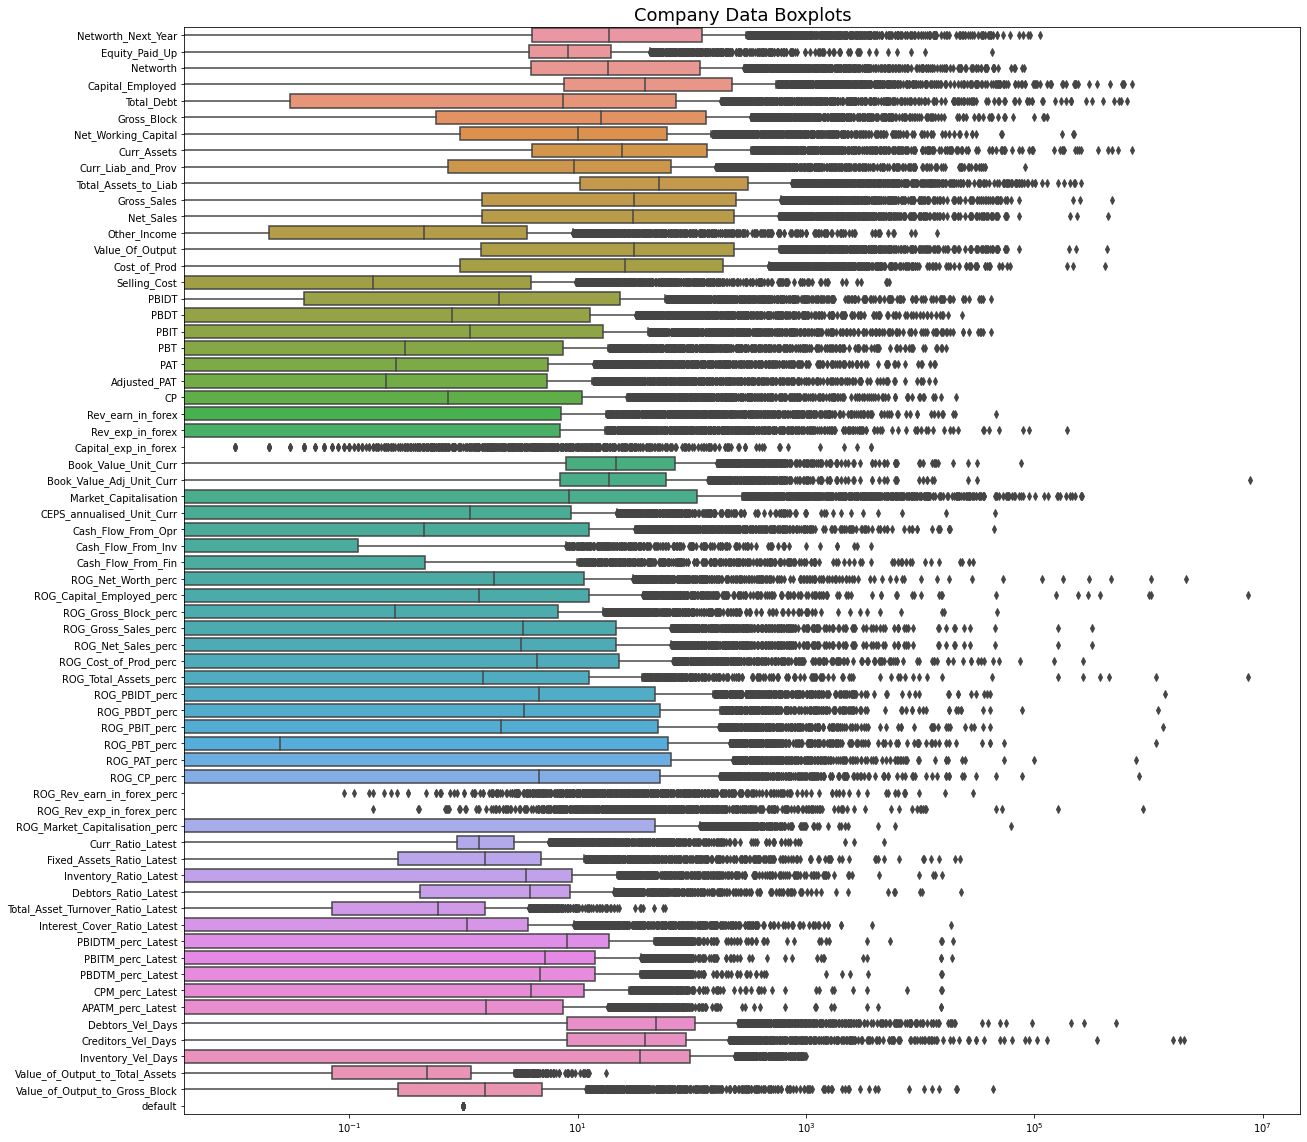

In [18]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = Company, orient="h")
ax.set_title('Company Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

There are missing values in the dataset

<AxesSubplot:xlabel='Networth', ylabel='Capital_Employed'>

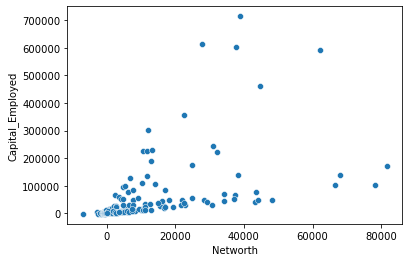

In [19]:
sns.scatterplot(x="Networth",
                    y="Capital_Employed",
                    data=Company)

<AxesSubplot:xlabel='Cost_of_Prod', ylabel='Gross_Sales'>

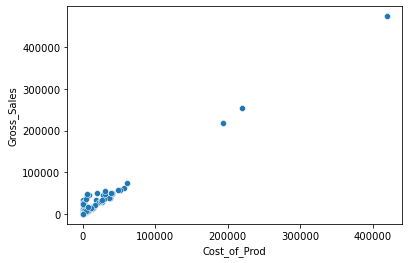

In [20]:
sns.scatterplot(x="Cost_of_Prod",
                    y="Gross_Sales",
                    data=Company)

In [21]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [22]:
Company_X

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,32557.39,94566.81,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,9050.59,80956.65,...,39.92,32.17,29.81,30.52,22.77,13,53,77.00,0.29,1.00
3583,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,83232.98,223919.73,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,30903.80,204002.94,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


#### Let's check the number of outliers per column

In [23]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [24]:
((Company_X > UL) | (Company_X < LL)).sum()

Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
                                  ... 
Debtors_Vel_Days                   398
Creditors_Vel_Days                 391
Inventory_Vel_Days                 262
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 65, dtype: int64

In [25]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [26]:
Company_X.isnull().sum()

Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
                                  ... 
Debtors_Vel_Days                   398
Creditors_Vel_Days                 391
Inventory_Vel_Days                 365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 65, dtype: int64

In [27]:
Company_X.isnull().sum().sum()

42149

In [28]:
Company_X = Company_X.drop(['Networth_Next_Year'], axis = 1)

In [29]:
Company_X.shape

(3586, 64)

In [30]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

#### Let's visually inspect the missing values in our data

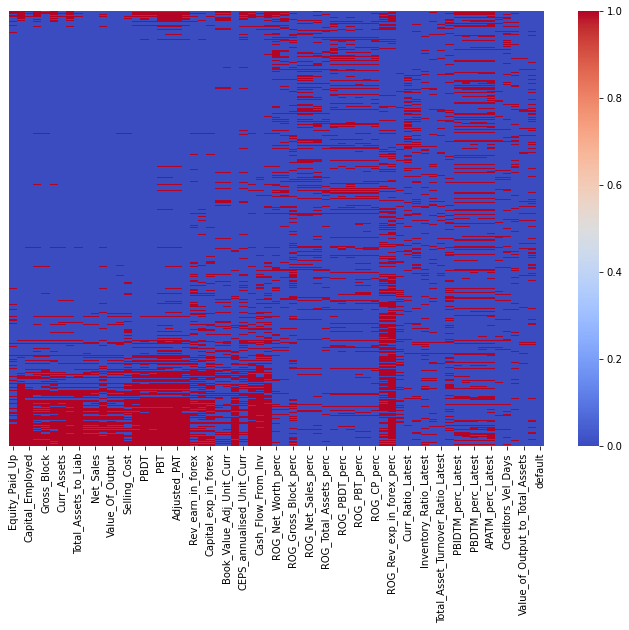

In [31]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = True, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### We should inspect total missing values by each row.

In [32]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

#### Let's filter the data which is 90% or more complete at the row level

In [33]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [34]:
Company_sub1_temp.shape

(1203, 65)

In [35]:
Company_sub1_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

In [36]:
78/388

0.20103092783505155

In [37]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [38]:
null_30=Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

In [39]:
null_30.head(30)

ROG_Rev_exp_in_forex_perc     0.45
ROG_Rev_earn_in_forex_perc    0.37
Cash_Flow_From_Fin            0.28
PAT                           0.27
Adjusted_PAT                  0.27
PBT                           0.26
APATM_perc_Latest             0.26
Cash_Flow_From_Inv            0.24
ROG_Gross_Block_perc          0.23
CP                            0.23
PBDT                          0.23
Cash_Flow_From_Opr            0.22
ROG_Net_Worth_perc            0.21
Rev_earn_in_forex             0.21
Interest_Cover_Ratio_Latest   0.20
CPM_perc_Latest               0.20
PBIT                          0.20
PBITM_perc_Latest             0.20
PBDTM_perc_Latest             0.19
Capital_exp_in_forex          0.19
Rev_exp_in_forex              0.19
ROG_Cost_of_Prod_perc         0.19
ROG_Gross_Sales_perc          0.19
PBIDT                         0.19
ROG_Net_Sales_perc            0.19
Networth                      0.18
Market_Capitalisation         0.18
ROG_CP_perc                   0.18
ROG_PBDT_perc       

#### Dropping columns with more than 30% missing values 

In [40]:
Company_sub2 = Company_sub1.drop(['Cash_Flow_From_Fin','ROG_Rev_exp_in_forex_perc','Adjusted_PAT','PAT','PBT','Cash_Flow_From_Inv',
                                'Rev_earn_in_forex','PBDT','CP','ROG_Rev_earn_in_forex_perc','Cash_Flow_From_Opr','Rev_exp_in_forex',
                                'ROG_Gross_Block_perc','PBIT','ROG_Market_Capitalisation_perc','PBIDT' ],
                           axis = 1)

In [41]:
Company_sub2.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Curr_Assets',
       'Curr_Liab_and_Prov', 'Total_Assets_to_Liab', 'Gross_Sales',
       'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Prod',
       'Selling_Cost', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Sales_perc',
       'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc', 'Curr_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest',
       'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest',
       'AP

In [42]:
Company_sub2.shape

(3586, 49)

#### Segregate the predictors and response 

In [43]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

#### Scale the predictors 

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [45]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values

In [46]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [47]:
imputer = KNNImputer(n_neighbors=10)

In [48]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [49]:
Company_imputed.isnull().sum()

Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
Gross_Block                          0
Net_Working_Capital                  0
Curr_Assets                          0
Curr_Liab_and_Prov                   0
Total_Assets_to_Liab                 0
Gross_Sales                          0
Net_Sales                            0
Other_Income                         0
Value_Of_Output                      0
Cost_of_Prod                         0
Selling_Cost                         0
Capital_exp_in_forex                 0
Book_Value_Unit_Curr                 0
Book_Value_Adj_Unit_Curr             0
Market_Capitalisation                0
CEPS_annualised_Unit_Curr            0
ROG_Net_Worth_perc                   0
ROG_Capital_Employed_perc            0
ROG_Gross_Sales_perc                 0
ROG_Net_Sales_perc                   0
ROG_Cost_of_Prod_perc                0
ROG_Total_Assets_perc    

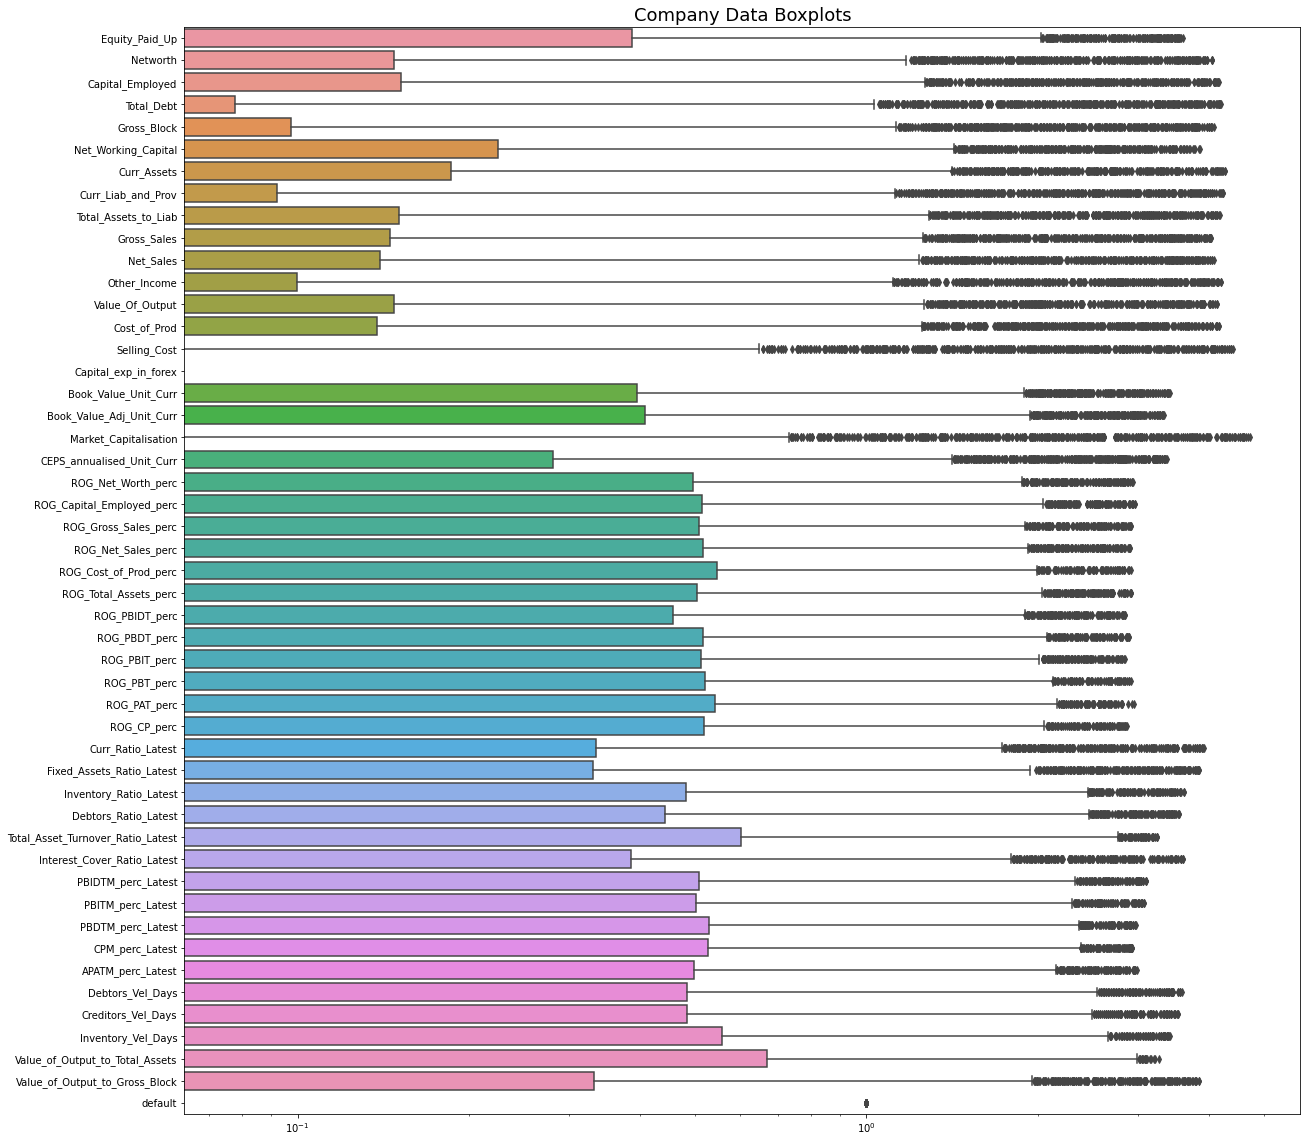

In [50]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = Company_sub3, orient="h")
ax.set_title('Company Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

#### Inspect possible correlations between independent variables 

<AxesSubplot:>

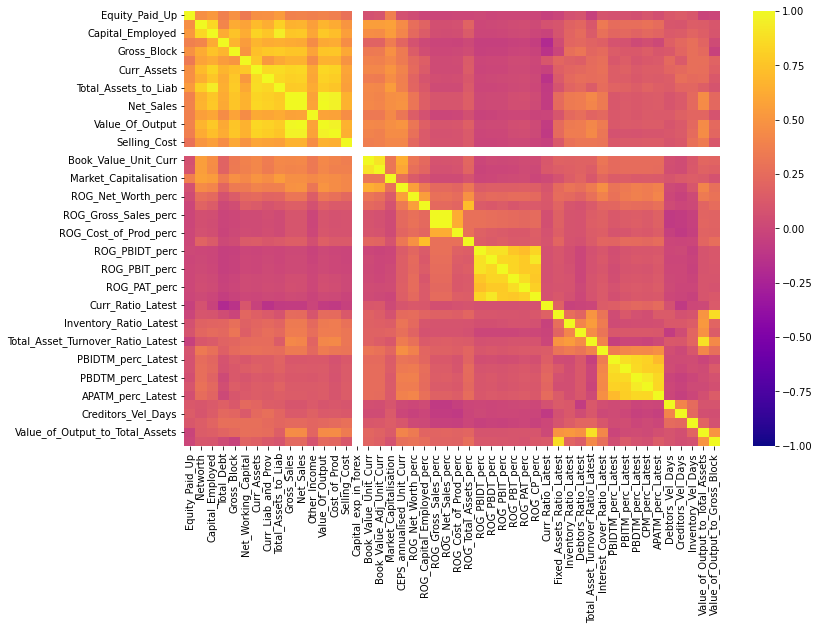

In [51]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [52]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Splitting the data into train and test sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [55]:
#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

#### For modeling we will use Logistic Regression with recursive feature elimination

In [56]:
LogR = LogisticRegression(solver='liblinear')

In [57]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [58]:
selector = selector.fit(X_train, y_train)

In [59]:
selector.n_features_

15

In [60]:
selector.ranking_

array([30,  1,  1, 15,  1, 17,  1,  1,  1,  1, 19,  9,  1,  1, 18, 34,  1,
        1, 16, 31,  1,  1, 29, 33,  4, 14, 24, 13, 32, 23, 28, 12,  1,  6,
       26, 27,  8,  1,  5,  2, 21, 22,  3, 20, 11, 10,  7, 25])

In [61]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
4,Gross_Block,1
6,Curr_Assets,1
7,Curr_Liab_and_Prov,1
8,Total_Assets_to_Liab,1
9,Gross_Sales,1
12,Value_Of_Output,1
13,Cost_of_Prod,1
16,Book_Value_Unit_Curr,1


In [62]:
import statsmodels.formula.api as SM

In [63]:
f_1='default~Networth+Capital_Employed+Gross_Block+Curr_Assets+Curr_Liab_and_Prov+Total_Assets_to_Liab+Gross_Sales+Value_Of_Output+Cost_of_Prod+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest'

In [64]:
model_1 = SM.logit(formula = f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.139748
         Iterations 10


In [65]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.5758
Time:                        11:54:10   Log-Likelihood:                -335.67
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.321e-184
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.0911      0.279    -18.274      0.000      -5.637      -4.545
Networth                       -1.5474      0.275     -5.627      0.000      -2.086      -1.008
Capital_Employed               -0.7536      0.289     -2.604      0.009      -1.321      -0.186
Gross_Block                     0.6923      0.212      3.261      0.001       0.276       1.108
Curr_Assets                     0.7550      0.285      2.651      0.008       0.197       1.313
Curr_Liab_and_Prov              0.3672      0.241      1.526      0.127      -0.104       0.839
Total_Assets_to_Liab            0.6380      0.299      2.136      0.033       0.052       1.223
Gross_Sales                    -0.9564      0.898     -1.065      0.287      -2.717       0.804
Value_Of_Output                -1.5254      0.869     -1.756      0.079      -3.228       0.178
Cost_of_Prod                    2.0338      0.501      4.061      0.000       1.052       3.015
Book_Value_Unit_Curr           -1.7355      0.591     -2.938      0.003      -2.893      -0.578
Book_Value_Adj_Unit_Curr       -1.7633      0.565     -3.119      0.002      -2.871      -0.655
ROG_Net_Worth_perc             -0.5175      0.148     -3.501      0.000      -0.807      -0.228
ROG_Capital_Employed_perc       0.3712      0.126      2.958      0.003       0.125       0.617
Curr_Ratio_Latest              -1.1639      0.168     -6.919      0.000      -1.494      -0.834
Interest_Cover_Ratio_Latest    -0.5865      0.161     -3.643      0.000      -0.902      -0.271
===============================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [66]:
f_2='default~Networth+Capital_Employed+Gross_Block+Curr_Assets+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest'

In [67]:
model_2 = SM.logit(formula = f_2, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.139989
         Iterations 10


In [68]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.5751
Time:                        11:54:10   Log-Likelihood:                -336.25
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.848e-185
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.0817      0.279    -18.230      0.000      -5.628      -4.535
Networth                       -1.5297      0.274     -5.591      0.000      -2.066      -0.993
Capital_Employed               -0.7574      0.286     -2.653      0.008      -1.317      -0.198
Gross_Block                     0.6946      0.212      3.271      0.001       0.278       1.111
Curr_Assets                     0.7466      0.285      2.620      0.009       0.188       1.305
Curr_Liab_and_Prov              0.3285      0.236      1.390      0.165      -0.135       0.792
Total_Assets_to_Liab            0.6547      0.294      2.225      0.026       0.078       1.231
Value_Of_Output                -2.2850      0.521     -4.384      0.000      -3.307      -1.263
Cost_of_Prod                    1.8631      0.480      3.881      0.000       0.922       2.804
Book_Value_Unit_Curr           -1.8897      0.547     -3.456      0.001      -2.961      -0.818
Book_Value_Adj_Unit_Curr       -1.6130      0.522     -3.090      0.002      -2.636      -0.590
ROG_Net_Worth_perc             -0.5074      0.147     -3.444      0.001      -0.796      -0.219
ROG_Capital_Employed_perc       0.3684      0.126      2.928      0.003       0.122       0.615
Curr_Ratio_Latest              -1.1654      0.168     -6.933      0.000      -1.495      -0.836
Interest_Cover_Ratio_Latest    -0.5934      0.161     -3.696      0.000      -0.908      -0.279
===============================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [69]:
f_3='default~Networth+Capital_Employed+Gross_Block+Curr_Assets+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest'

In [70]:
model_3 = SM.logit(formula = f_3, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.140403
         Iterations 10


In [71]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.5738
Time:                        11:54:10   Log-Likelihood:                -337.25
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                8.897e-186
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.0829      0.279    -18.250      0.000      -5.629      -4.537
Networth                       -1.6153      0.273     -5.920      0.000      -2.150      -1.080
Capital_Employed               -0.8436      0.285     -2.956      0.003      -1.403      -0.284
Gross_Block                     0.7802      0.203      3.847      0.000       0.383       1.178
Curr_Assets                     0.8844      0.268      3.294      0.001       0.358       1.411
Total_Assets_to_Liab            0.7699      0.281      2.739      0.006       0.219       1.321
Value_Of_Output                -2.1786      0.519     -4.201      0.000      -3.195      -1.162
Cost_of_Prod                    1.8261      0.485      3.767      0.000       0.876       2.776
Book_Value_Unit_Curr           -1.8298      0.548     -3.338      0.001      -2.904      -0.755
Book_Value_Adj_Unit_Curr       -1.6382      0.526     -3.117      0.002      -2.668      -0.608
ROG_Net_Worth_perc             -0.5072      0.146     -3.463      0.001      -0.794      -0.220
ROG_Capital_Employed_perc       0.3644      0.125      2.909      0.004       0.119       0.610
Curr_Ratio_Latest              -1.1871      0.168     -7.083      0.000      -1.516      -0.859
Interest_Cover_Ratio_Latest    -0.5773      0.161     -3.581      0.000      -0.893      -0.261
===============================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Now all the variables are significant, therefore, we don't need to eliminate any variable.

In [72]:
vif = pd.DataFrame()
vif['Features'] = Default_train.columns
vif['VIF'] = [variance_inflation_factor(Default_train.values, i) for i in range(Default_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Net_Sales,232.46
12,Value_Of_Output,140.41
9,Gross_Sales,90.56
22,ROG_Gross_Sales_perc,87.47
23,ROG_Net_Sales_perc,87.44
13,Cost_of_Prod,16.25
8,Total_Assets_to_Liab,13.78
40,PBDTM_perc_Latest,11.88
2,Capital_Employed,11.49
27,ROG_PBDT_perc,10.47


In [73]:
f_3='default~Networth+Gross_Block+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest'

In [74]:
model_3 = SM.logit(formula = f_3, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.150295
         Iterations 9


In [75]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.5438
Time:                        11:54:10   Log-Likelihood:                -361.01
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.715e-180
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -4.6576      0.239    -19.507      0.000      -5.126      -4.190
Networth                       -1.4259      0.239     -5.964      0.000      -1.894      -0.957
Gross_Block                     1.1491      0.131      8.792      0.000       0.893       1.405
Book_Value_Unit_Curr           -1.6693      0.539     -3.097      0.002      -2.726      -0.613
Book_Value_Adj_Unit_Curr       -1.2717      0.516     -2.466      0.014      -2.283      -0.261
ROG_Net_Worth_perc             -0.4754      0.143     -3.316      0.001      -0.756      -0.194
ROG_Capital_Employed_perc       0.3250      0.123      2.640      0.008       0.084       0.566
Curr_Ratio_Latest              -1.1800      0.160     -7.387      0.000      -1.493      -0.867
Interest_Cover_Ratio_Latest    -0.6248      0.153     -4.083      0.000      -0.925      -0.325
===============================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [76]:
y_prob_pred_train = model_3.predict(Default_train)
y_prob_pred_train

662    0.09
1373   0.00
3268   0.01
3246   0.00
1456   0.00
       ... 
1130   0.00
1294   0.01
860    0.04
3507   0.01
3174   0.01
Length: 2402, dtype: float64

In [77]:
y_prob_pred_test = model_3.predict(Default_test)
y_prob_pred_test

3163   0.00
3133   0.00
937    0.17
196    0.91
2852   0.08
       ... 
2953   0.00
3116   0.00
1010   0.00
1292   0.00
2130   0.00
Length: 1184, dtype: float64

In [78]:
y_class_pred_tr=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_tr.append(a)

In [79]:
def comp(Name,d,train,test):
    metricx=classification_report(train,test,digits=5,output_dict=True)
    df=pd.DataFrame(metricx).transpose()
    f1=round(df.loc["1.0"][2],4)
    recall=round(df.loc["1.0"][1],4)
    pre=round(df.loc["1.0"][0],4)
    acc=round(df.loc["accuracy"][1],4)
    
    globals() [Name+'_'+d+'_f1' ] = f1
    globals() [Name+'_'+d+'_recall' ] = recall
    globals() [Name+'_'+d+'_pre' ] = pre
    globals() [Name+'_'+d+'_acc' ] = acc
   
   

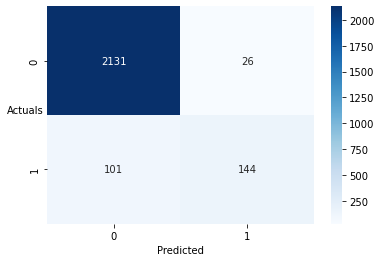

In [80]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred_tr)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [81]:
print(metrics.classification_report(Default_train['default'],y_class_pred_tr,digits=3))

              precision    recall  f1-score   support

         0.0      0.955     0.988     0.971      2157
         1.0      0.847     0.588     0.694       245

    accuracy                          0.947      2402
   macro avg      0.901     0.788     0.833      2402
weighted avg      0.944     0.947     0.943      2402



In [82]:
y_class_pred_tt=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_tt.append(a)

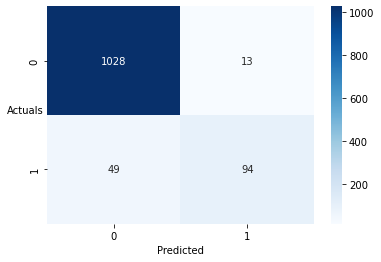

In [83]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred_tt)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [84]:
print(metrics.classification_report(Default_test['default'],y_class_pred_tt,digits=3))

              precision    recall  f1-score   support

         0.0      0.955     0.988     0.971      1041
         1.0      0.879     0.657     0.752       143

    accuracy                          0.948      1184
   macro avg      0.917     0.822     0.861      1184
weighted avg      0.945     0.948     0.944      1184



AUC for the Training Data: 0.788
AUC for the Test Data: 0.822


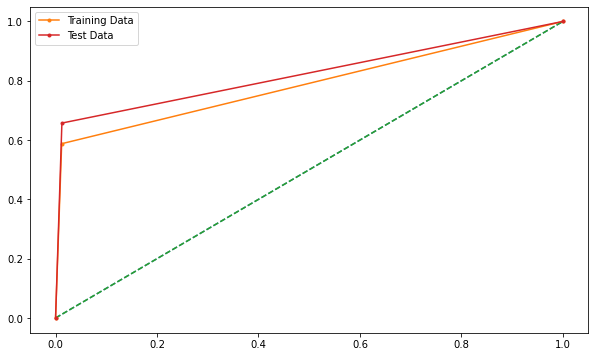

In [85]:
# AUC and ROC for the training data
plt.figure(figsize=(10,6))
# calculate AUC
lda_train_auc_gr = metrics.roc_auc_score(y_train,y_class_pred_tr)
print('AUC for the Training Data: %.3f' % lda_train_auc_gr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_class_pred_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc_gr = metrics.roc_auc_score(y_test,y_class_pred_tt)
print('AUC for the Test Data: %.3f' % lda_test_auc_gr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_class_pred_tt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [86]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [87]:
optimal_idx = np.argmax(tpr - fpr)

In [88]:
optimal_threshold = thresholds[optimal_idx]

In [89]:
optimal_threshold

0.23092694519681115

In [90]:
y_class_pred_tr=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_tr.append(a)

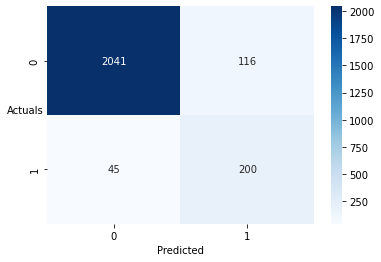

In [91]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred_tr)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [92]:
print(metrics.classification_report(Default_train['default'],y_class_pred_tr,digits=3))

              precision    recall  f1-score   support

         0.0      0.978     0.946     0.962      2157
         1.0      0.633     0.816     0.713       245

    accuracy                          0.933      2402
   macro avg      0.806     0.881     0.838      2402
weighted avg      0.943     0.933     0.937      2402



In [93]:
comp('lg','train',Default_train['default'],y_class_pred_tr)

In [94]:
fpr, tpr, thresholds = roc_curve(Default_test['default'],y_prob_pred_test)

In [95]:
optimal_idx = np.argmax(tpr - fpr)

In [96]:
optimal_threshold = thresholds[optimal_idx]

In [97]:
optimal_threshold

0.3462857960994453

In [98]:
y_class_pred_tt=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_tt.append(a)

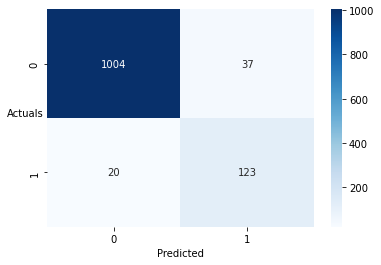

In [99]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred_tt)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [100]:
print(metrics.classification_report(Default_test['default'],y_class_pred_tt,digits=3))

              precision    recall  f1-score   support

         0.0      0.980     0.964     0.972      1041
         1.0      0.769     0.860     0.812       143

    accuracy                          0.952      1184
   macro avg      0.875     0.912     0.892      1184
weighted avg      0.955     0.952     0.953      1184



In [101]:
comp('lg','test',Default_test['default'],y_class_pred_tt)

AUC for the Training Data: 0.881
AUC for the Test Data: 0.912


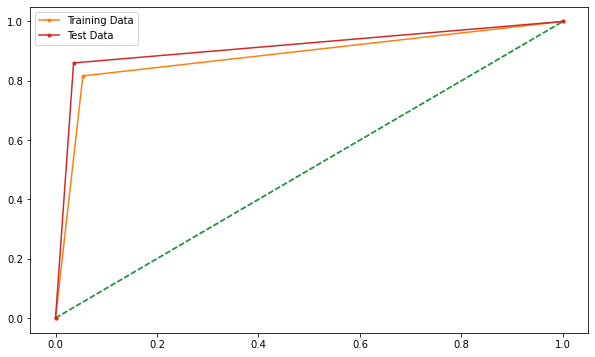

In [102]:
# AUC and ROC for the training data
plt.figure(figsize=(10,6))
# calculate AUC
lg_train_auc = metrics.roc_auc_score(y_train,y_class_pred_tr)
print('AUC for the Training Data: %.3f' % lg_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_class_pred_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lg_test_auc = metrics.roc_auc_score(y_test,y_class_pred_tt)
print('AUC for the Test Data: %.3f' % lg_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_class_pred_tt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Random Forest Classifier

#### Random forest model with grid search

In [103]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [104]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [105]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 25}

In [106]:
best_grid = grid_search.best_estimator_

In [107]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

#### Performance Metrics - Train Data

In [108]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2157
         1.0       0.93      0.79      0.85       245

    accuracy                           0.97      2402
   macro avg       0.95      0.89      0.92      2402
weighted avg       0.97      0.97      0.97      2402



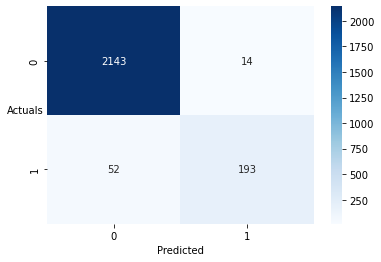

In [109]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Performance Metrics - Test Data

In [110]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1041
         1.0       0.95      0.85      0.89       143

    accuracy                           0.98      1184
   macro avg       0.96      0.92      0.94      1184
weighted avg       0.98      0.98      0.97      1184



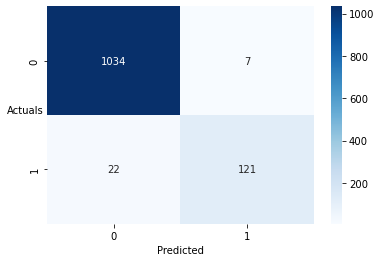

In [111]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [112]:
# Training Data Probability Prediction
pred_prob_train = best_grid.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid.predict_proba(X_test)

AUC for the Training Data: 0.996
AUC for the Test Data: 0.992


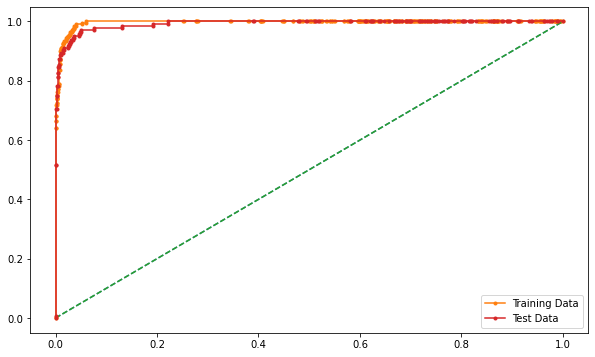

In [113]:
# AUC and ROC for the training data
plt.figure(figsize=(10,6))
# calculate AUC
lg_test_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lg_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lg_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lg_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Performance Metrics - Train Data (Custom Cut-off)

In [114]:
pred_train_rf_prob = best_grid.predict_proba(X_train)[:,1]
pred_test_rf_prob = best_grid.predict_proba(X_test)[:,1]

In [115]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_rf_prob)

In [116]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.14418517368195988

In [117]:
y_class_pred_tr=[]
for i in range(0,len(pred_train_rf_prob)):
    if np.array(pred_train_rf_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_tr.append(a)

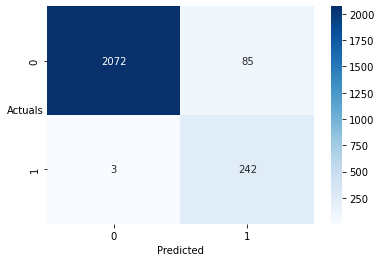

In [118]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_tr)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [119]:
print(metrics.classification_report(y_train, y_class_pred_tr,digits=3))

              precision    recall  f1-score   support

         0.0      0.999     0.961     0.979      2157
         1.0      0.740     0.988     0.846       245

    accuracy                          0.963      2402
   macro avg      0.869     0.974     0.913      2402
weighted avg      0.972     0.963     0.966      2402



In [120]:
comp('rf','train',y_train,y_class_pred_tr)

#### Performance Metrics - Test Data (Custom Cut-off)

In [121]:
pred_train_rf_prob = best_grid.predict_proba(X_train)[:,1]
pred_test_rf_prob = best_grid.predict_proba(X_test)[:,1]

In [122]:
fpr, tpr, thresholds = roc_curve(y_test,pred_test_rf_prob)

In [123]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.1423784060995533

In [124]:
y_class_pred_tt=[]
for i in range(0,len(pred_test_rf_prob)):
    if np.array(pred_test_rf_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_tt.append(a)

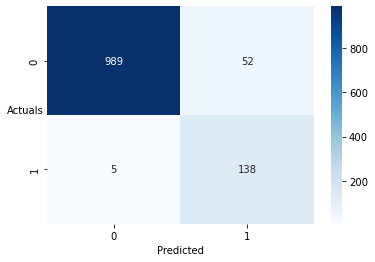

In [125]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred_tt)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [126]:
print(metrics.classification_report(y_test, y_class_pred_tt,digits=3))

              precision    recall  f1-score   support

         0.0      0.995     0.950     0.972      1041
         1.0      0.726     0.965     0.829       143

    accuracy                          0.952      1184
   macro avg      0.861     0.958     0.900      1184
weighted avg      0.963     0.952     0.955      1184



In [127]:
comp('rf','test',y_test,y_class_pred_tt)

AUC for the Training Data: 0.974
AUC for the Test Data: 0.958


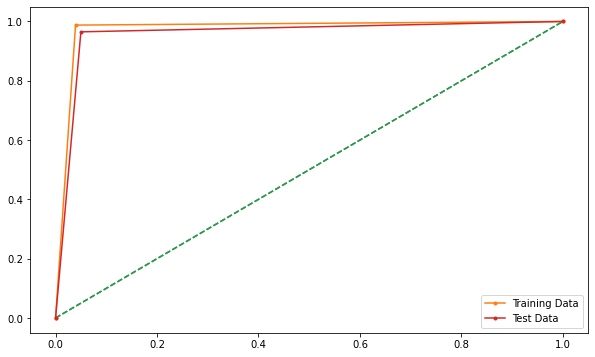

In [128]:
# AUC and ROC for the training data
plt.figure(figsize=(10,6))
# calculate AUC
rf_train_auc = metrics.roc_auc_score(y_train,y_class_pred_tr)
print('AUC for the Training Data: %.3f' % rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_class_pred_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
rf_test_auc = metrics.roc_auc_score(y_test,y_class_pred_tt)
print('AUC for the Test Data: %.3f' % rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_class_pred_tt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [129]:
feature_scores = pd.Series(best_grid.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores[feature_scores<=0.01].index.tolist

<bound method IndexOpsMixin.tolist of Index(['Curr_Assets', 'Total_Asset_Turnover_Ratio_Latest', 'PBITM_perc_Latest',
       'Value_of_Output_to_Gross_Block', 'ROG_Total_Assets_perc',
       'APATM_perc_Latest', 'Creditors_Vel_Days', 'Equity_Paid_Up',
       'Debtors_Vel_Days', 'Other_Income', 'Fixed_Assets_Ratio_Latest',
       'Gross_Block', 'Cost_of_Prod', 'Net_Sales', 'PBDTM_perc_Latest',
       'ROG_PBIDT_perc', 'Selling_Cost', 'Inventory_Vel_Days',
       'Market_Capitalisation', 'Curr_Liab_and_Prov', 'ROG_Gross_Sales_perc',
       'PBIDTM_perc_Latest', 'ROG_Cost_of_Prod_perc',
       'Value_of_Output_to_Total_Assets', 'Inventory_Ratio_Latest',
       'ROG_CP_perc', 'ROG_PBDT_perc', 'ROG_Net_Sales_perc',
       'ROG_Capital_Employed_perc', 'Gross_Sales', 'Debtors_Ratio_Latest',
       'Value_Of_Output', 'ROG_PBIT_perc', 'ROG_PAT_perc', 'ROG_PBT_perc',
       'Capital_exp_in_forex'],
      dtype='object')>

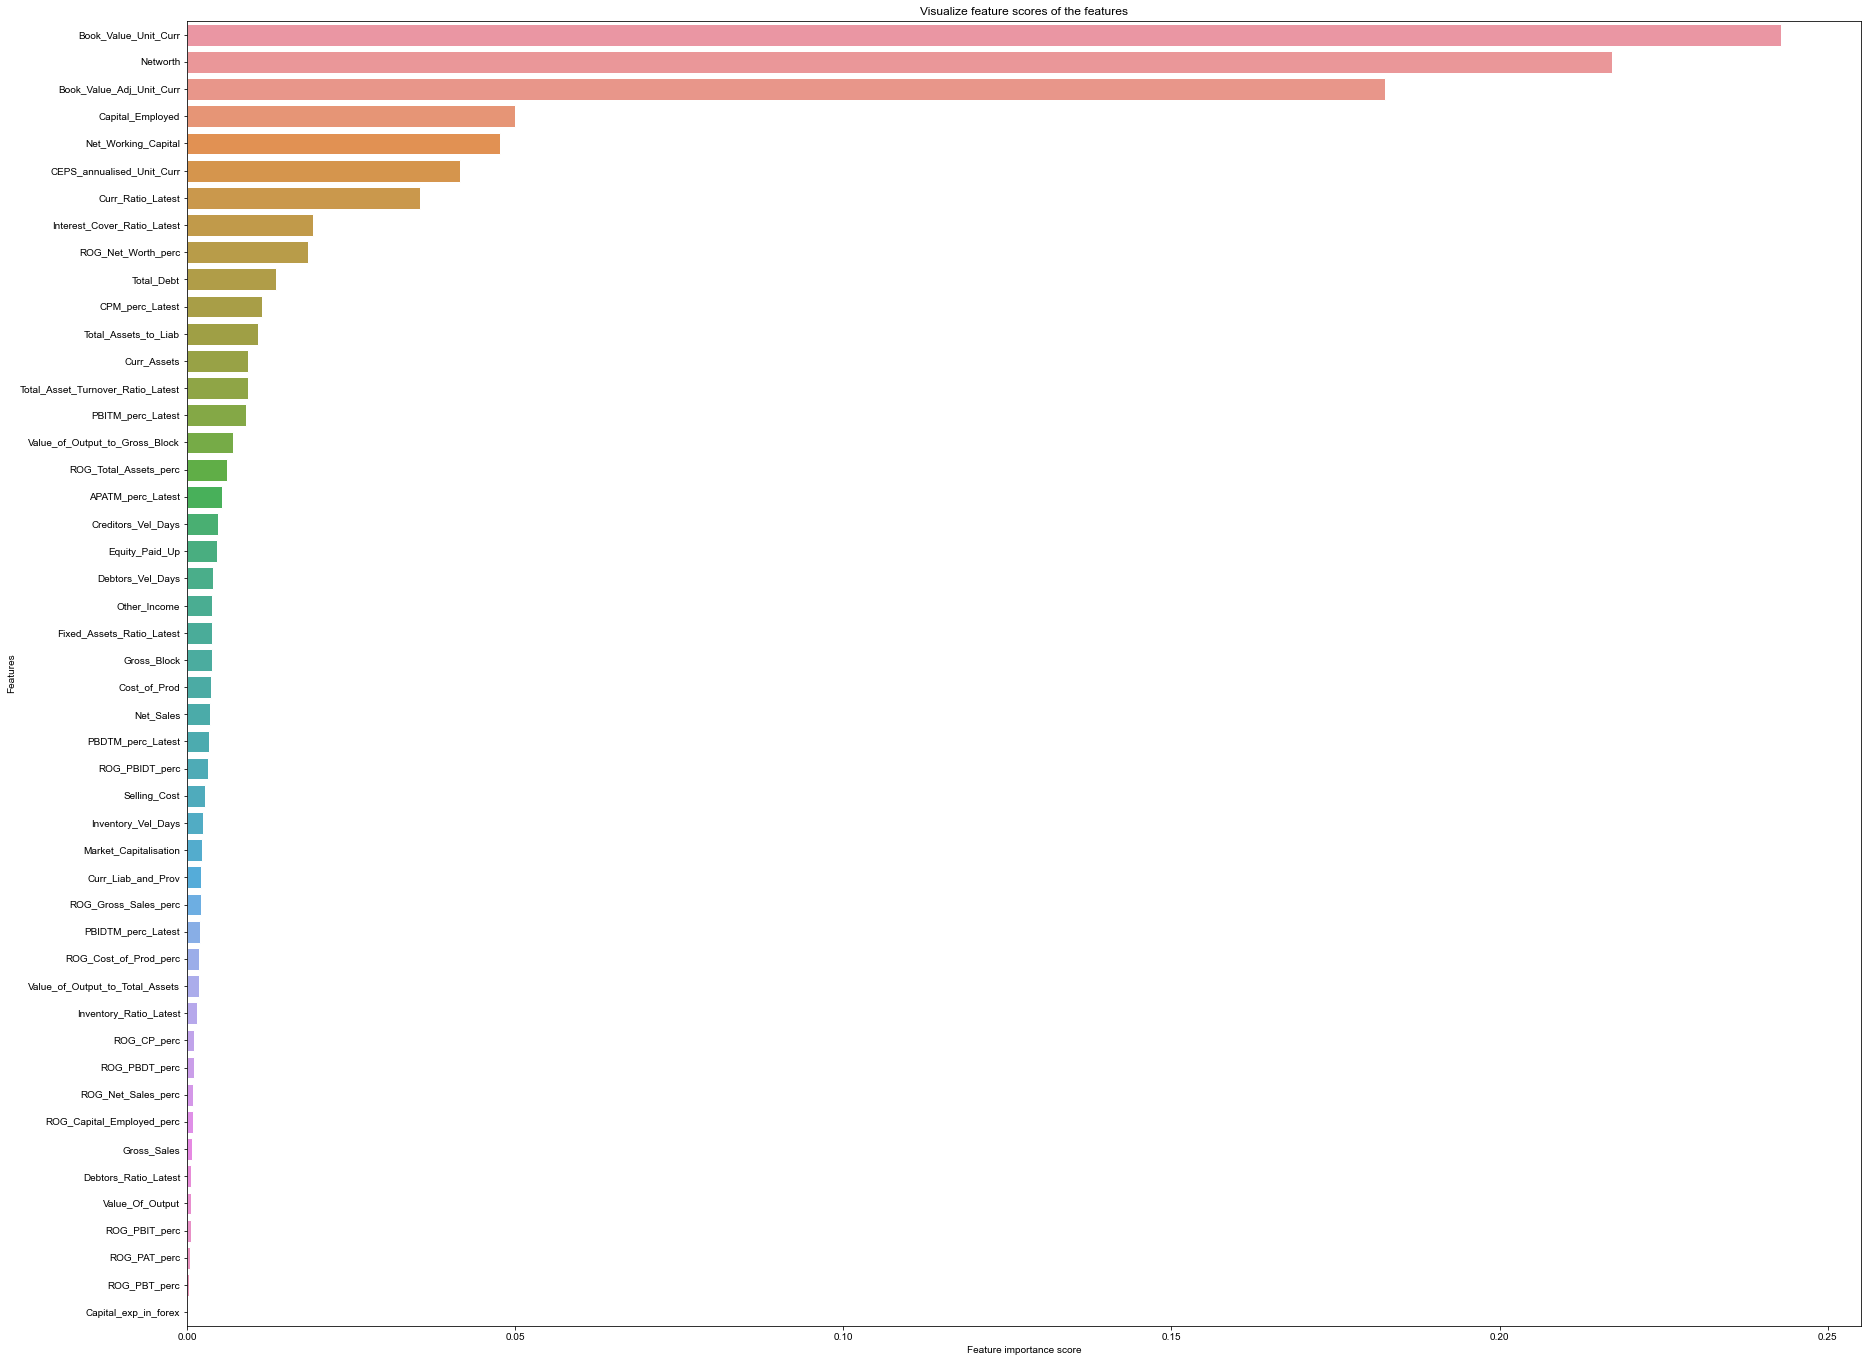

In [130]:
f, ax = plt.subplots(figsize=(30, 24))
sns.set(font_scale=1)
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [131]:
X_train_rf=X_train.drop(['ROG_Total_Assets_perc', 'ROG_Capital_Employed_perc', 'Equity_Paid_Up',
       'Gross_Block', 'PBDTM_perc_Latest', 'ROG_CP_perc', 'ROG_PBIT_perc',
       'Inventory_Ratio_Latest', 'PBIDTM_perc_Latest', 'Curr_Liab_and_Prov',
       'Debtors_Ratio_Latest', 'Creditors_Vel_Days', 'ROG_Cost_of_Prod_perc',
       'Value_of_Output_to_Total_Assets', 'Curr_Assets', 'Other_Income',
       'Fixed_Assets_Ratio_Latest', 'Total_Assets_to_Liab', 'Cost_of_Prod',
       'ROG_PBDT_perc', 'ROG_Gross_Sales_perc', 'Net_Sales',
       'Inventory_Vel_Days', 'ROG_PAT_perc', 'ROG_PBIDT_perc', 'Gross_Sales',
       'Selling_Cost', 'Value_Of_Output', 'Debtors_Vel_Days',
       'ROG_Net_Sales_perc', 'ROG_PBT_perc', 'Market_Capitalisation',
       'Capital_exp_in_forex'],axis=1)


In [132]:
X_test_rf=X_test.drop(['ROG_Total_Assets_perc', 'ROG_Capital_Employed_perc', 'Equity_Paid_Up',
       'Gross_Block', 'PBDTM_perc_Latest', 'ROG_CP_perc', 'ROG_PBIT_perc',
       'Inventory_Ratio_Latest', 'PBIDTM_perc_Latest', 'Curr_Liab_and_Prov',
       'Debtors_Ratio_Latest', 'Creditors_Vel_Days', 'ROG_Cost_of_Prod_perc',
       'Value_of_Output_to_Total_Assets', 'Curr_Assets', 'Other_Income',
       'Fixed_Assets_Ratio_Latest', 'Total_Assets_to_Liab', 'Cost_of_Prod',
       'ROG_PBDT_perc', 'ROG_Gross_Sales_perc', 'Net_Sales',
       'Inventory_Vel_Days', 'ROG_PAT_perc', 'ROG_PBIDT_perc', 'Gross_Sales',
       'Selling_Cost', 'Value_Of_Output', 'Debtors_Vel_Days',
       'ROG_Net_Sales_perc', 'ROG_PBT_perc', 'Market_Capitalisation',
       'Capital_exp_in_forex'],axis=1)



In [133]:
param_grid = {
    'max_depth': [5,5.5],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [20,23,26],
    'n_estimators': [30,35]
}

rfcl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [134]:
grid_search.fit(X_train_rf, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 5.5],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [20, 23, 26],
                         'n_estimators': [30, 35]})

In [135]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 35}

In [136]:
best_grid = grid_search.best_estimator_

In [137]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2157
         1.0       0.93      0.79      0.85       245

    accuracy                           0.97      2402
   macro avg       0.95      0.89      0.92      2402
weighted avg       0.97      0.97      0.97      2402



In [138]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1041
         1.0       0.95      0.85      0.89       143

    accuracy                           0.98      1184
   macro avg       0.96      0.92      0.94      1184
weighted avg       0.98      0.98      0.97      1184



In [139]:
pred_train_rf_prob = best_grid.predict_proba(X_train_rf)[:,1]
pred_test_rf_prob = best_grid.predict_proba(X_test_rf)[:,1]

In [140]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_rf_prob)

In [141]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.1305170992522888

In [142]:
y_class_pred_tr=[]
for i in range(0,len(pred_train_rf_prob)):
    if np.array(pred_train_rf_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_tr.append(a)

In [143]:
print(metrics.classification_report(y_train, y_class_pred_tr))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2157
         1.0       0.83      0.95      0.88       245

    accuracy                           0.97      2402
   macro avg       0.91      0.96      0.93      2402
weighted avg       0.98      0.97      0.98      2402



In [144]:
pred_train_rf_prob = best_grid.predict_proba(X_train_rf)[:,1]
pred_test_rf_prob = best_grid.predict_proba(X_test_rf)[:,1]

In [145]:
fpr, tpr, thresholds = roc_curve(y_test,pred_test_rf_prob)

In [146]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.08811310930895196

In [147]:
y_class_pred_tt=[]
for i in range(0,len(pred_test_rf_prob)):
    if np.array(pred_test_rf_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_tt.append(a)

In [148]:
print(metrics.classification_report(y_test, y_class_pred_tt))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1041
         1.0       0.73      0.96      0.83       143

    accuracy                           0.95      1184
   macro avg       0.86      0.95      0.90      1184
weighted avg       0.96      0.95      0.95      1184



In [149]:
selector = RFE(estimator = rfcl, n_features_to_select=15, step=1)

In [150]:
selector = selector.fit(X_train_rf, y_train)

In [151]:
selector.n_features_

15

In [152]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [153]:


df = pd.DataFrame({'Feature': X_train_rf.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Networth,1
1,Capital_Employed,1
2,Total_Debt,1
3,Net_Working_Capital,1
4,Book_Value_Unit_Curr,1
5,Book_Value_Adj_Unit_Curr,1
6,CEPS_annualised_Unit_Curr,1
7,ROG_Net_Worth_perc,1
8,Curr_Ratio_Latest,1
9,Total_Asset_Turnover_Ratio_Latest,1


## Linear Discriminant Analysis

In [154]:
LDA = LinearDiscriminantAnalysis()

In [155]:
lda_model = LDA.fit(X_train, y_train)

In [156]:

pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [157]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2157
         1.0       0.80      0.47      0.59       245

    accuracy                           0.93      2402
   macro avg       0.87      0.73      0.78      2402
weighted avg       0.93      0.93      0.93      2402



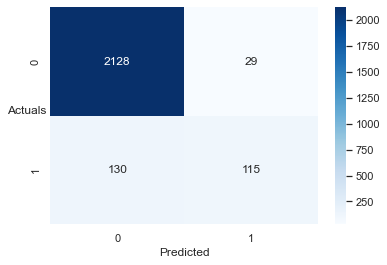

In [158]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [159]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1041
         1.0       0.82      0.49      0.61       143

    accuracy                           0.93      1184
   macro avg       0.88      0.74      0.79      1184
weighted avg       0.92      0.93      0.92      1184



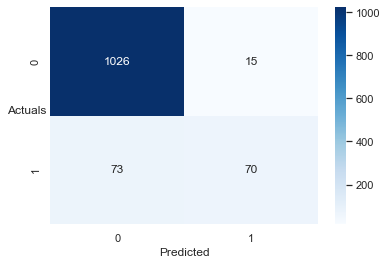

In [160]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [161]:
# Training Data Probability Prediction
pred_prob_lda = lda_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_lda = lda_model.predict_proba(X_test)


AUC for the Training Data: 0.996
AUC for the Test Data: 0.992


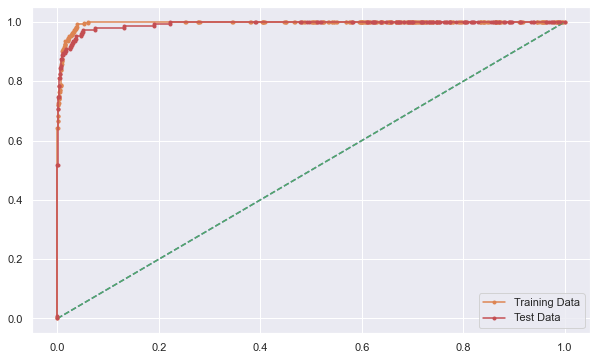

In [162]:
# AUC and ROC for the training data
plt.figure(figsize=(10,6))
# calculate AUC
lda_train_auc_gr = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc_gr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc_gr = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc_gr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Performance Metrics - Train Data (Custom Cut-off)

In [163]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [164]:
pred_train_lda_prob

array([0.04799451, 0.00423187, 0.21429423, ..., 0.05644944, 0.02282151,
       0.01531836])

In [165]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [166]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.061481408469861755

In [167]:
y_class_pred_tr=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_tr.append(a)

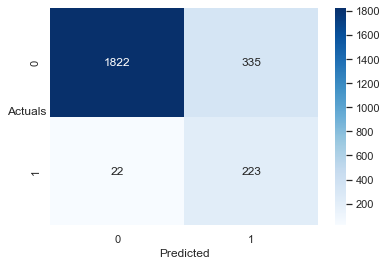

In [168]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_tr)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [169]:
print(metrics.classification_report(y_train, y_class_pred_tr,digits=3))

              precision    recall  f1-score   support

         0.0      0.988     0.845     0.911      2157
         1.0      0.400     0.910     0.555       245

    accuracy                          0.851      2402
   macro avg      0.694     0.877     0.733      2402
weighted avg      0.928     0.851     0.875      2402



In [170]:
comp('lda','train',y_train,y_class_pred_tr)

#### Performance Metrics - Test Data (Custom Cut-off)

In [171]:
fpr, tpr, thresholds = roc_curve(y_test,pred_test_lda_prob)

In [172]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.09754533500579361

In [173]:
y_class_pred_tt=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_tt.append(a)

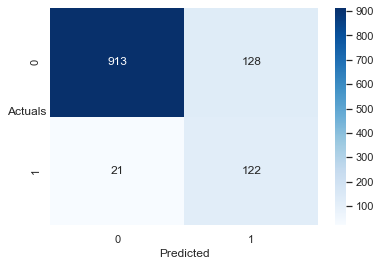

In [174]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred_tt)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [175]:
print(metrics.classification_report(y_test, y_class_pred_tt,digits=3))

              precision    recall  f1-score   support

         0.0      0.978     0.877     0.925      1041
         1.0      0.488     0.853     0.621       143

    accuracy                          0.874      1184
   macro avg      0.733     0.865     0.773      1184
weighted avg      0.918     0.874     0.888      1184



In [176]:
comp('lda','test',y_test,y_class_pred_tt)

AUC for the Training Data: 0.877
AUC for the Test Data: 0.865


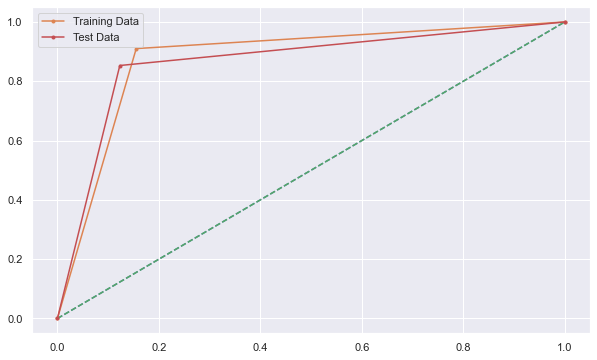

In [177]:
# AUC and ROC for the training data
plt.figure(figsize=(10,6))
# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,y_class_pred_tr)
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_class_pred_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,y_class_pred_tt)
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_class_pred_tt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [178]:
selector = RFE(estimator = lda_model, n_features_to_select=15, step=1)

In [179]:
selector = selector.fit(X_train, y_train)

In [180]:
selector.n_features_

15

In [181]:
selector.ranking_

df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
1,Networth,1
4,Gross_Block,1
7,Curr_Liab_and_Prov,1
9,Gross_Sales,1
10,Net_Sales,1
11,Other_Income,1
12,Value_Of_Output,1
16,Book_Value_Unit_Curr,1
17,Book_Value_Adj_Unit_Curr,1
20,ROG_Net_Worth_perc,1


In [182]:
drp=df[df['Rank'] != 1]

In [183]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lg_train_acc,lg_train_auc,lg_train_recall,lg_train_pre,lg_train_f1],
        'LR Test':[lg_test_acc,lg_test_auc,lg_test_recall,lg_test_pre,lg_test_f1],
                     
         'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_pre,rf_train_f1],
         'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_pre,rf_test_f1],
                     
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_pre,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_pre,lda_test_f1]},index=index)





data.columns=pd.MultiIndex.from_arrays([['LR','LR','RF','RF','LDA','LDA'],['Train','Test','Train','Test','Train','Test']])
data

LR         RF        LDA     
          Train Test Train Test Train Test
Accuracy   0.93 0.95  0.96 0.95  0.85 0.87
AUC        0.88 0.99  0.97 0.96  0.88 0.87
Recall     0.82 0.86  0.99 0.96  0.91 0.85
Precision  0.63 0.77  0.74 0.73  0.40 0.49
F1 Score   0.71 0.81  0.85 0.83  0.56 0.62